In [152]:
# 为了兼容python2和python3
from __future__ import division,print_function,unicode_literals

# 导入相应的包
import numpy as np
import pandas as pd
import os

# 为了保持稳定性一致
np.random.seed(42)

# 画图设置
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

import warnings 
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
sns.set_style('darkgrid')                    # darkgrid,whitegrid,dark,white,ticks

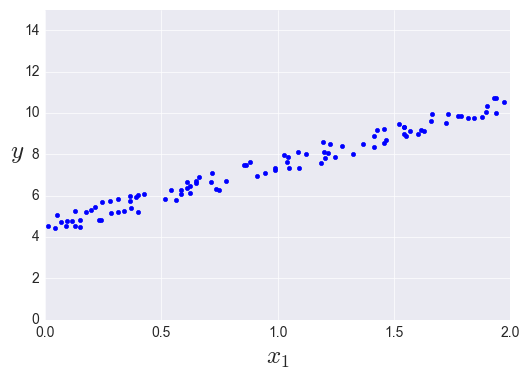

In [116]:
X = np.random.rand(100,1) * 2
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show()

#### 学习

In [117]:
a = np.array([1,2,3])
a.shape

(3,)

In [118]:
a = np.array([[1,2,3]])
a.shape

(1, 3)

In [119]:
a = np.array([[1,2,3],[12,2,3]])
a.shape

(2, 3)

In [120]:
X.shape

(100, 1)

In [121]:
np.ones((100, 1)).shape

(100, 1)

In [122]:
X[:4]

array([[ 0.74908024],
       [ 1.90142861],
       [ 1.46398788],
       [ 1.19731697]])

In [123]:
np.ones((100, 1))[:4]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [124]:
np.c_[np.ones((100, 1)),X][:4]

array([[ 1.        ,  0.74908024],
       [ 1.        ,  1.90142861],
       [ 1.        ,  1.46398788],
       [ 1.        ,  1.19731697]])

In [125]:
np.c_[np.array([[1,2,3],[12,2,3]]),np.random.rand(2,3)]

array([[  1.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          6.42031646e-01,   8.41399650e-02,   1.61628714e-01],
       [  1.20000000e+01,   2.00000000e+00,   3.00000000e+00,
          8.98554189e-01,   6.06429060e-01,   9.19705162e-03]])

#### np.linalg?

Linear algebra basics:

- norm            Vector or matrix norm
- inv             Inverse of a square matrix
- solve           Solve a linear system of equations
- det             Determinant of a square matrix
- lstsq           Solve linear least-squares problem
- pinv            Pseudo-inverse (Moore-Penrose) calculated using a singular
                  value decomposition
- matrix_power    Integer power of a square matrix

Eigenvalues and decompositions:

- eig             Eigenvalues and vectors of a square matrix
- eigh            Eigenvalues and eigenvectors of a Hermitian matrix
- eigvals         Eigenvalues of a square matrix
- eigvalsh        Eigenvalues of a Hermitian matrix
- qr              QR decomposition of a matrix
- svd             Singular value decomposition of a matrix
- cholesky        Cholesky decomposition of a matrix

Tensor operations:

- tensorsolve     Solve a linear tensor equation
- tensorinv       Calculate an inverse of a tensor

Exceptions:

- LinAlgError     Indicates a failed linear algebra operation



#### 线性代数
#### numpy.linalg模块包含线性代数的函数。使用这个模块，可以计算逆矩阵、求特征值、解线性方程组以及求解行列式等。

import numpy as np

#### 1. 计算逆矩阵
#### 创建矩阵
A = np.mat("0 1 2;1 0 3;4 -3 8")
print (A)
[[ 0 1 2]
 [ 1 0 3]
 [ 4 -3 8]]

#### 使用inv函数计算逆矩阵
inv = np.linalg.inv(A)
print (inv)
[[-4.5 7. -1.5]
 [-2. 4. -1. ]
 [ 1.5 -2. 0.5]]

#### 检查原矩阵和求得的逆矩阵相乘的结果为单位矩阵
print (A * inv)
[[ 1. 0. 0.]
 [ 0. 1. 0.]
 [ 0. 0. 1.]]

#### 注：矩阵必须是方阵且可逆，否则会抛出LinAlgError异常。


#### 2. 求解线性方程组
#### numpy.linalg中的函数solve可以求解形如 Ax = b 的线性方程组，其中 A 为矩阵，b 为一维或二维的数组，x 是未知变量

import numpy as np

#### 创建矩阵和数组
B = np.mat("1 -2 1;0 2 -8;-4 5 9")
b = np.array([0,8,-9])

#### 调用solve函数求解线性方程
x = np.linalg.solve(B,b)
print (x)
[ 29. 16. 3.]

#### 使用dot函数检查求得的解是否正确
print (np.dot(B , x))
[[ 0. 8. -9.]]


#### 3. 特征值和特征向量
#### 特征值（eigenvalue）即方程 Ax = ax 的根，是一个标量。其中，A 是一个二维矩阵，x 是一个一维向量。特征向量（eigenvector）是关于特征值的向量

#### numpy.linalg模块中，eigvals函数可以计算矩阵的特征值，而eig函数可以返回一个包含特征值和对应的特征向量的元组

import numpy as np

#### 创建一个矩阵
C = np.mat("3 -2;1 0")

#### 调用eigvals函数求解特征值
c0 = np.linalg.eigvals(C)
print (c0)
[ 2. 1.]

#### 使用eig函数求解特征值和特征向量 (该函数将返回一个元组，按列排放着特征值和对应的特征向量，其中第一列为特征值，第二列为特征向量)
c1,c2 = np.linalg.eig(C)
print (c1)
[ 2. 1.] 
print (c2)
[[ 0.89442719 0.70710678]
 [ 0.4472136 0.70710678]]

#### 使用dot函数验证求得的解是否正确
for i in range(len(c1)):
print ("left:",np.dot(C,c2[:,i]))
print ("right:",c1[i] * c2[:,i])
left: [[ 1.78885438]
     [ 0.89442719]]
right: [[ 1.78885438]
      [ 0.89442719]]
left: [[ 0.70710678]
     [ 0.70710678]]
right: [[ 0.70710678]
      [ 0.70710678]]


#### 4.奇异值分解
#### SVD（Singular Value Decomposition，奇异值分解）是一种因子分解运算，将一个矩阵分解为3个矩阵的乘积

#### numpy.linalg模块中的svd函数可以对矩阵进行奇异值分解。该函数返回3个矩阵——U、Sigma和V，其中U和V是正交矩阵，Sigma包含输入矩阵的奇异值。

import numpy as np

#### 分解矩阵
D = np.mat("4 11 14;8 7 -2")

#### 使用svd函数分解矩阵
U,Sigma,V = np.linalg.svd(D,full_matrices=False)

print ("U:",U)
U: [[-0.9486833 -0.31622777]
   [-0.31622777 0.9486833 ]]

print ("Sigma:",Sigma)
Sigma: [ 18.97366596 9.48683298]

print ("V",V)
V [[-0.33333333 -0.66666667 -0.66666667]
   [ 0.66666667 0.33333333 -0.66666667]]

#### 结果包含等式中左右两端的两个正交矩阵U和V，以及中间的奇异值矩阵Sigma

#### 使用diag函数生成完整的奇异值矩阵。将分解出的3个矩阵相乘
print (U * np.diag(Sigma) * V)
[[ 4. 11. 14.]
 [ 8. 7. -2.]]

#### 5. 广义逆矩阵
#### 使用numpy.linalg模块中的pinv函数进行求解,
#### 注：inv函数只接受方阵作为输入矩阵，而pinv函数则没有这个限制

import numpy as np

#### 创建一个矩阵
E = np.mat("4 11 14;8 7 -2")

#### 使用pinv函数计算广义逆矩阵
pseudoinv = np.linalg.pinv(E)
print (pseudoinv)
[[-0.00555556 0.07222222]
 [ 0.02222222 0.04444444]
 [ 0.05555556 -0.05555556]]

#### 将原矩阵和得到的广义逆矩阵相乘
print (E * pseudoinv)
[[ 1.00000000e+00 -5.55111512e-16]
 [ 0.00000000e+00 1.00000000e+00]]

#### 6. 行列式

#### numpy.linalg模块中的det函数可以计算矩阵的行列式

import numpy as np

#### 计算矩阵的行列式
F = np.mat("3 4;5 6")

#### 使用det函数计算行列式
print (np.linalg.det(F))
-2.0

#### np.linalg.inv?
计算矩阵的逆

#### np.dot?

**行向量乘以一个列向量称作向量的内积，又叫作点积，结果是一个数;**

**列向量乘以一个行向量称作向量的外积，外积结果是一个矩阵;**

* 1.如果处理的是一维数组，则得到的是两数组的內积（顺便去补一下数学知识）
    In : d = np.arange(0,9)
    Out: array([0, 1, 2, 3, 4, 5, 6, 7, 8])

    In : e = d[::-1]
    Out: array([8, 7, 6, 5, 4, 3, 2, 1, 0])

    In : np.dot(d,e) 
    Out: 84
    
* 2.如果是二维数组（矩阵）之间的运算，则得到的是矩阵积（mastrix product） 

    In : a = np.arange(1,5).reshape(2,2)
    Out:
    array([[1, 2],
         [3, 4]])
    In : b = np.arange(5,9).reshape(2,2)

    Out:
    array([[5, 6],
         [7, 8]])


    In : np.dot(a,b)
    Out:
    array([[19, 22],
         [43, 50]])
    
所得到的数组中的每个元素为，**第一个矩阵中与该元素行号相同的元素与第二个矩阵与该元素列号相同的元素，两两相乘后再求和。**这个在线性代数中有讲解

![](https://upload-images.jianshu.io/upload_images/8885151-02c2513d693f3a7a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

* 3.dot()函数可以通过numpy库调用，也可以由数组实例对象进行调用。a.dot(b) 与 np.dot(a,b)效果相同。
    
    矩阵积计算不遵循交换律np.dot(a,b) 和 np.dot(b,a) 得到的结果是不一样的。

In [126]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [127]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.51359766],
       [ 10.48006601]])

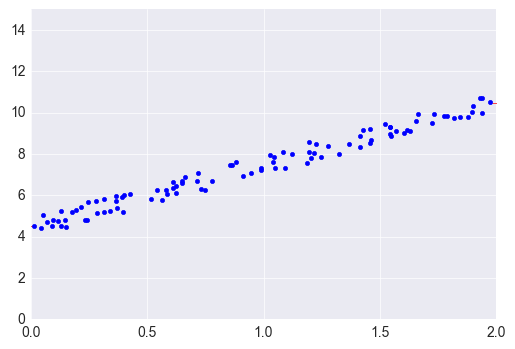

In [128]:
plt.plot(X_new,y_predict,"r_")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

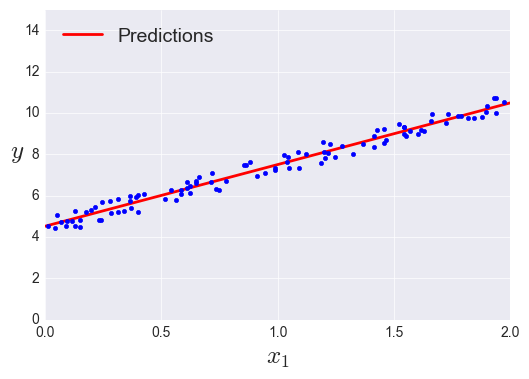

In [129]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# 上面扯了那么多，试试sklearn

In [130]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # 使用默认参数
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 4.51359766]), array([[ 2.98323418]]))

In [131]:
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [132]:
import scipy
theta_best_svd = scipy.linalg.lstsq(X_b,y)
theta_best_svd

(array([[ 4.51359766],
        [ 2.98323418]]),
 array([ 8.49565526]),
 2,
 array([ 14.37020392,   4.11961067]))

In [133]:
np.linalg.pinv(X_b).dot(y)

array([[ 4.51359766],
       [ 2.98323418]])

# batch gradient descent

In [134]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [135]:
theta

array([[ 4.51359766],
       [ 2.98323418]])

In [136]:
X_new_b.dot(theta)

array([[  4.51359766],
       [ 10.48006601]])

In [137]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path=None):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title("$\eta = {}$".format(eta),fontsize=16)

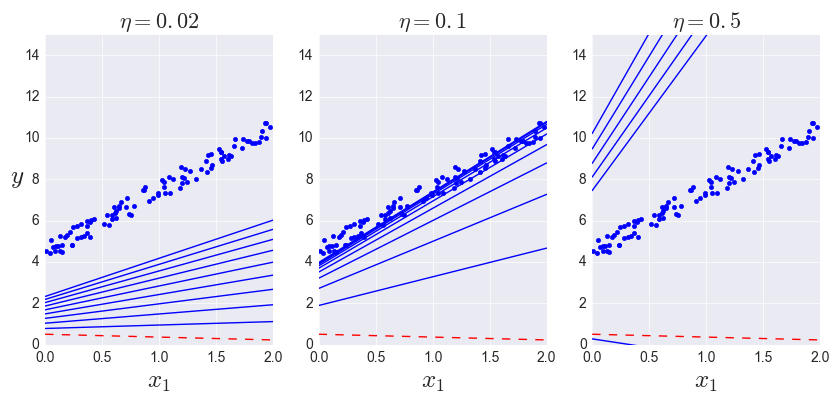

In [138]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))

plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)

plt.subplot(132)
plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)

plt.show()

# Stochastic Gradient Descent

<function matplotlib.pyplot.show>

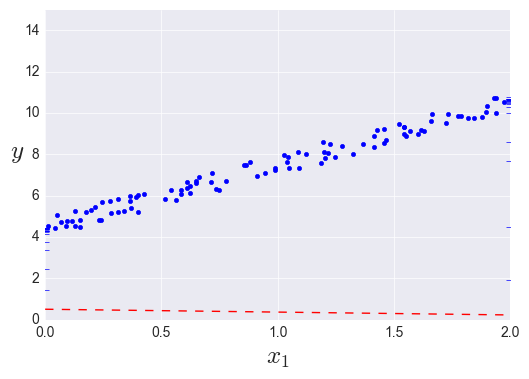

In [139]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0,t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b_" if i > 0 else "r--"
            plt.plot(X_new, y_predict,style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([0,2,0,15])
plt.show

In [140]:
theta

array([[ 4.51548062],
       [ 2.9775157 ]])

### 试试sklearn

In [141]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50,penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [142]:
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.51388816]), array([ 2.98206789]))

# Mini-batch gradient descent

In [143]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200,1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [144]:
theta

array([[ 4.52651397],
       [ 2.99723869]])

In [145]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

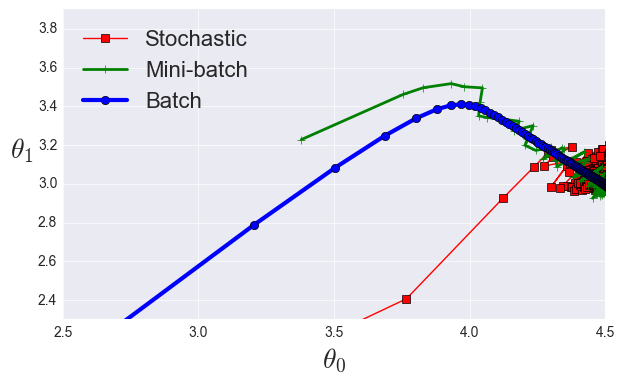

In [146]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 多项式回归

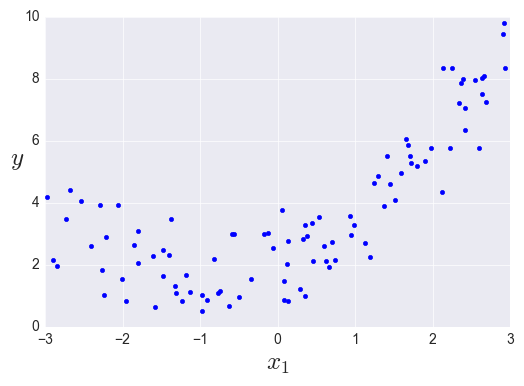

In [147]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [148]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([ 2.38942838])

In [149]:
X_poly[0]

array([ 2.38942838,  5.709368  ])

In [150]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.9735233]), array([[ 0.95038538,  0.52577032]]))

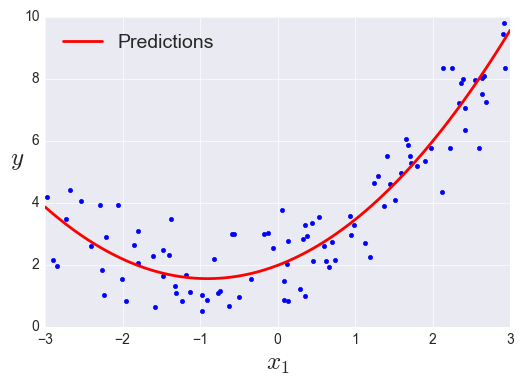

In [151]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

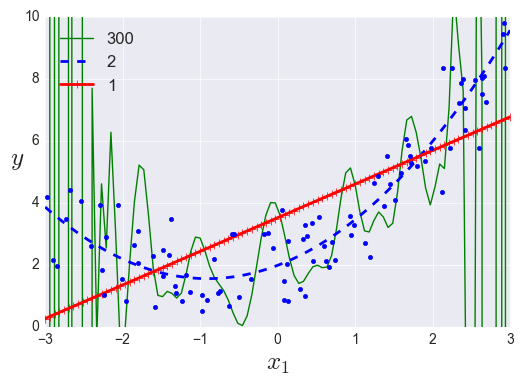

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 学习曲线

In [154]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

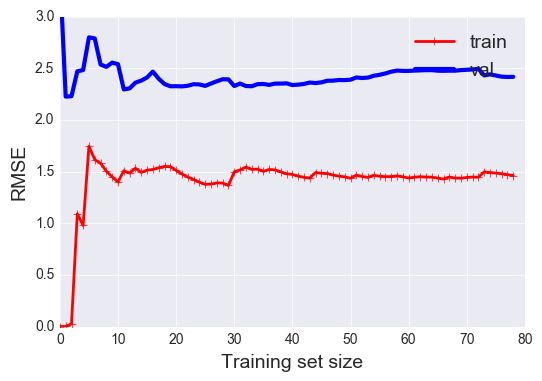

In [155]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()  

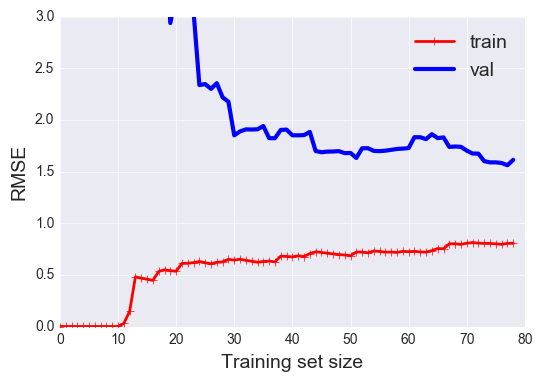

In [156]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()  

# 正则化模型

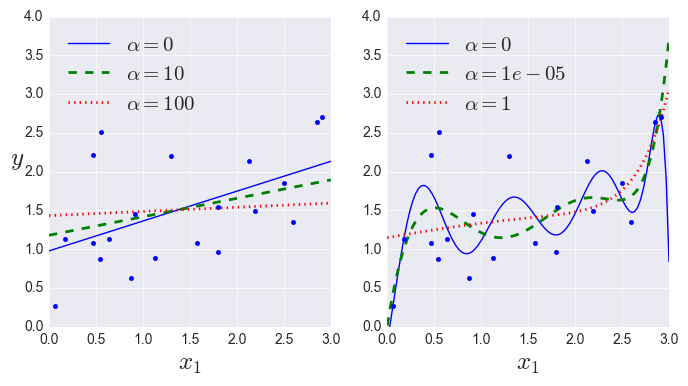

In [158]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [159]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.55071465]])

In [160]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.13500145])

In [161]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[ 1.5507201]])

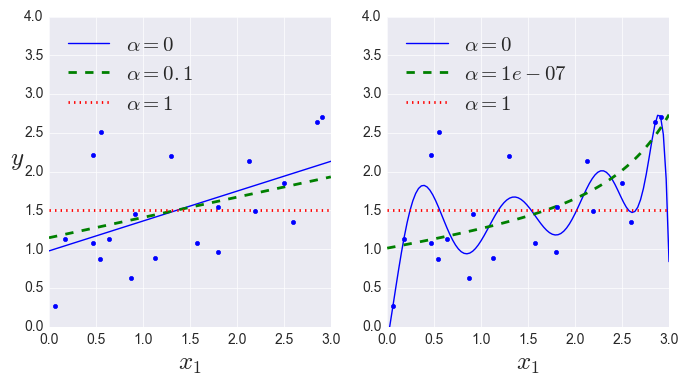

In [162]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [163]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([ 1.53788174])

In [164]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([ 1.54333232])

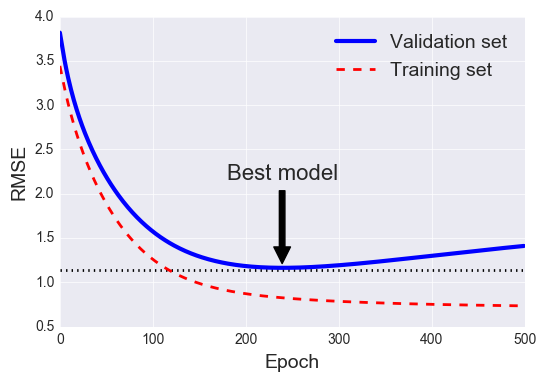

In [165]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [166]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [167]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

In [168]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

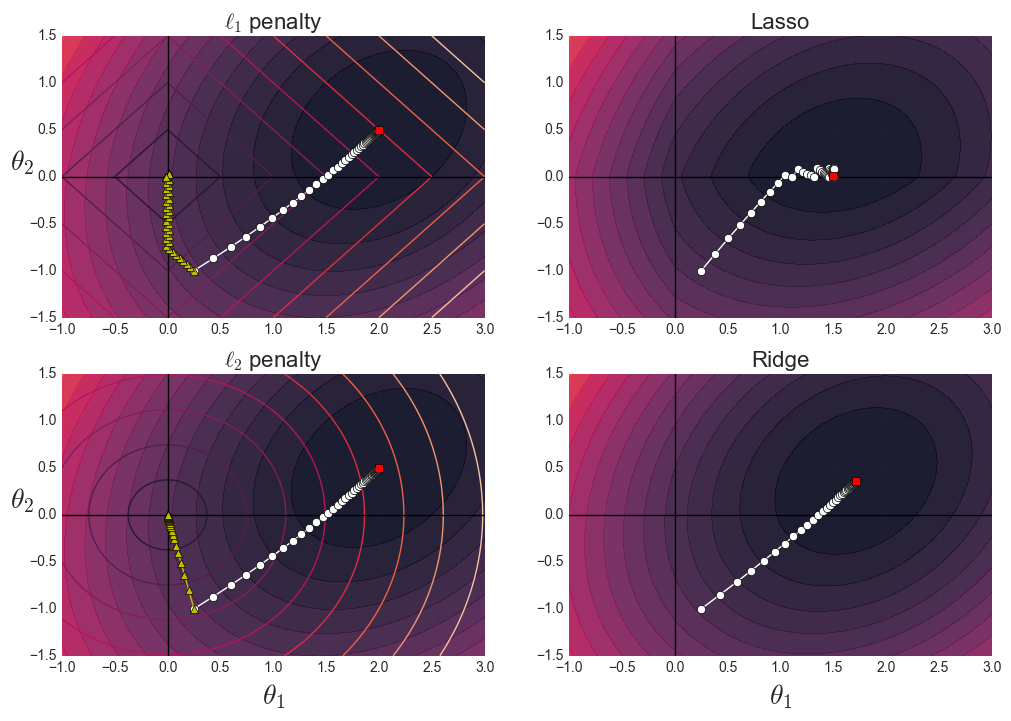

In [169]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

# 逻辑回归

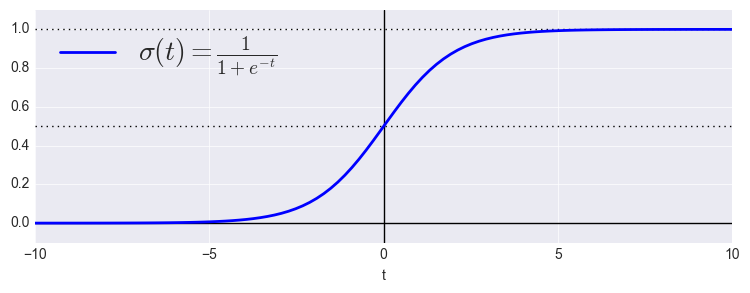

In [170]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [171]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['target', 'target_names', 'data', 'feature_names', 'DESCR']

In [172]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [173]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [174]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

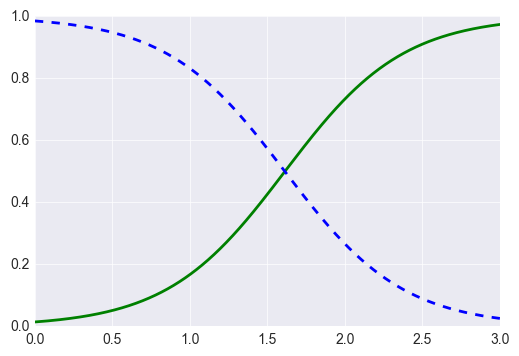

In [175]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

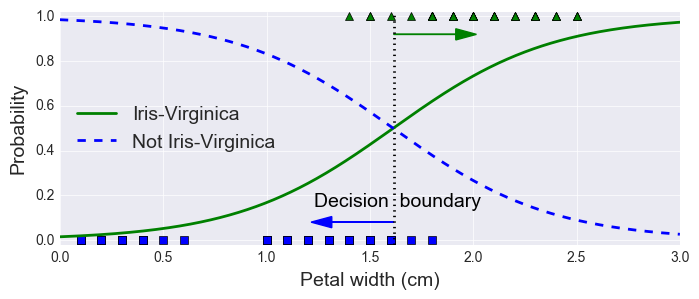

In [176]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [177]:
decision_boundary

array([ 1.61561562])

In [178]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

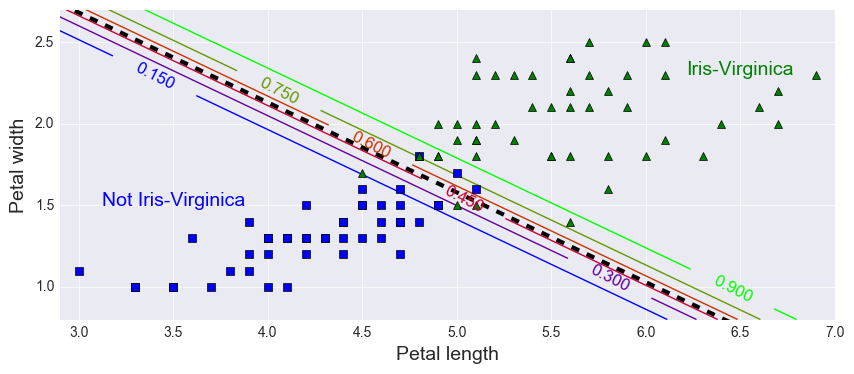

In [179]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# softmax回归

In [180]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

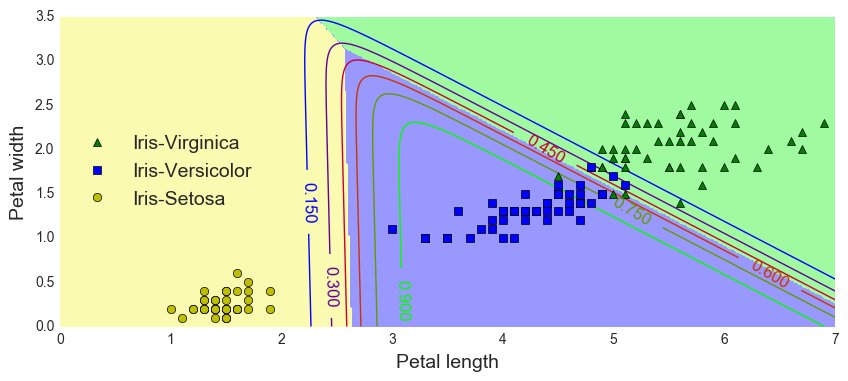

In [181]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [182]:
softmax_reg.predict([[5, 2]])

array([2])

In [183]:
softmax_reg.predict_proba([[5, 2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])